## EDA of World Population 2023 Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## get the data

In [2]:
df = pd.read_excel("world_population2023.xlsx")

In [3]:
df.head()

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
0,0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5


## No. of rows & columns

In [4]:
df.shape

(205, 10)

## Data Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          205 non-null    int64 
 1   country name        205 non-null    object
 2   current population  205 non-null    object
 3   population 2022     205 non-null    object
 4   area                205 non-null    object
 5   land area           205 non-null    object
 6   density             205 non-null    object
 7   growth rate         205 non-null    object
 8   world percentage    204 non-null    object
 9   rank                205 non-null    int64 
dtypes: int64(2), object(8)
memory usage: 16.1+ KB


## checking for null values

In [6]:
df.isnull().sum()

Unnamed: 0            0
country name          0
current population    0
population 2022       0
area                  0
land area             0
density               0
growth rate           0
world percentage      1
rank                  0
dtype: int64

In [7]:
mask = df["world percentage"].isna()

In [8]:
df[mask]

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank
204,204,Vatican City,518,510,< 1,< 1,"1,177",1.57%,NaN,234


In [9]:
df["world percentage"].fillna(0,inplace=True)

In [10]:
df.columns

Index(['Unnamed: 0', 'country name', 'current population', 'population 2022',
       'area', 'land area', 'density', 'growth rate', 'world percentage',
       'rank'],
      dtype='object')

## checking duplicate values

In [11]:
# finding duplicated values
df[df.duplicated()]

,Unnamed: 0,country name,current population,population 2022,area,land area,density,growth rate,world percentage,rank


## Drop unnecessary column

In [12]:
# delete the Unnamed: 0 column
df.drop("Unnamed: 0",axis=1,inplace=True)

In [13]:
# renaming column

df.rename(columns= {"country name":"country"},inplace=True)
df.rename(columns= {"current population":"population 2023"},inplace=True)

In [14]:
df

,country,population 2023,population 2022,area,land area,density,growth rate,world percentage,rank
0,India,"1,423,118,510","1,417,173,173",3.3M,3M,481,0.81%,17.85%,1
1,China,"1,425,820,141","1,425,887,337",9.7M,9.4M,151,-0.02%,17.81%,2
2,United States,"339,231,549","338,289,857",9.4M,9.1M,37,0.50%,4.25%,3
3,Indonesia,"276,576,867","275,501,339",1.9M,1.9M,148,0.74%,3.47%,4
4,Pakistan,"238,517,163","235,824,862",881.9K,770.9K,312,1.98%,3.00%,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,"33,642","33,660",61,60,561,-0.05%,0.00%,218
201,Palau,"18,058","18,055",459,460,39,0.02%,0.00%,222
202,Nauru,"12,780","12,668",21,20,639,0.88%,0.00%,225
203,Tuvalu,"11,396","11,312",26,30,380,0.74%,0.00%,227


## replacing "," and "%" sign

In [15]:


df["population 2023"] = df["population 2023"].str.replace(",","")
df["population 2022"] = df["population 2022"].str.replace(",","")
df["growth rate"] = df["growth rate"].str.replace("%","")
df["world percentage"] = df["world percentage"].str.replace("%","")

In [16]:
# updating the values

df.loc[0,"population 2023"] = 1429834379
df.loc[0,"growth rate"] = 0.91

## changing numeric datatypes

In [17]:
df = df.astype({"population 2023":"int",
                "population 2022":"int",
                "growth rate":"float",
                "world percentage":"float"},
                errors="raise")

## Find Top 10 Highly Populated Countries in 2023

In [23]:
df.set_index("country",inplace=True)

In [27]:
df.sort_values("population 2023",ascending=False).head(10)

,population 2023,population 2022,area,land area,density,growth rate,world percentage,rank
country,,,,,,,,
India,1429834379,1417173173,3.3M,3M,481,0.91,17.85,1
China,1425820141,1425887337,9.7M,9.4M,151,-0.02,17.81,2
United States,339231549,338289857,9.4M,9.1M,37,0.50,4.25,3
Indonesia,276576867,275501339,1.9M,1.9M,148,0.74,3.47,4
Pakistan,238517163,235824862,881.9K,770.9K,312,1.98,3.00,5
Nigeria,221592544,218541212,923.8K,910.8K,246,2.41,2.80,6
Brazil,215904975,215313498,8.5M,8.4M,26,0.52,2.70,7
Bangladesh,172220907,171186372,147.6K,130.2K,"1,329",1.03,2.16,8
Russia,144652401,144713314,17.1M,16.4M,9,-0.19,1.80,9


## visualize Growth rates of top ten highly populated countries and 2023 population

In [26]:
viz = df.head(10)


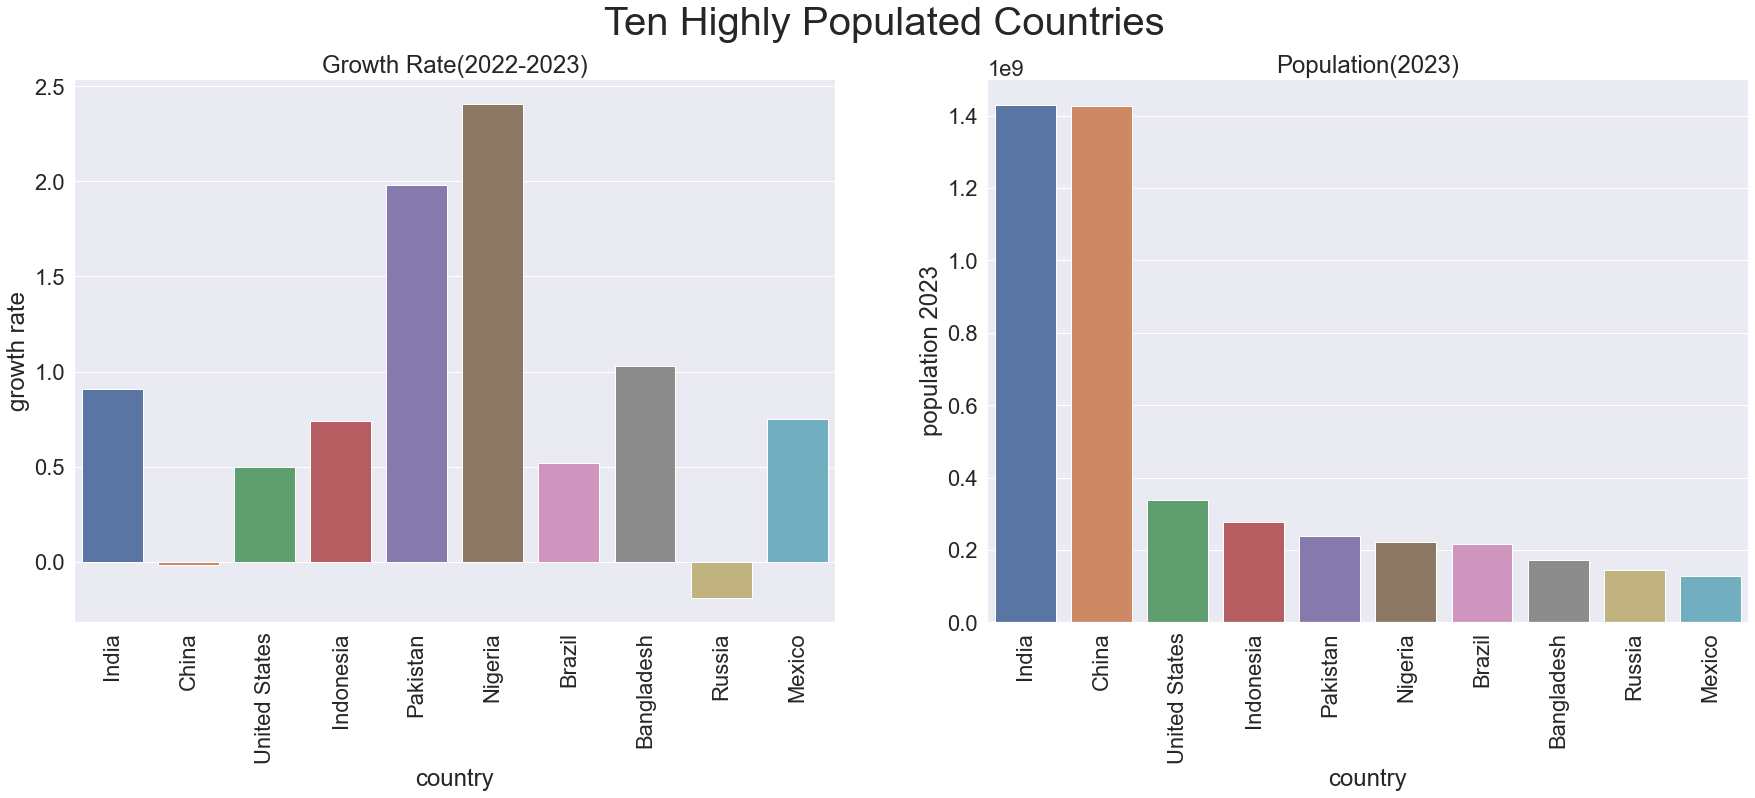

In [39]:
sns.set(font_scale=2)
fig , ax = plt.subplots(1,2,figsize=(30,10))
sns.barplot(data=viz,x="country",y="growth rate",ax = ax[0])
sns.barplot(data=viz,x="country",y="population 2023",ax = ax[1])

ax[0].set_title("Growth Rate(2022-2023)")
ax[1].set_title("Population(2023)")

ax[0].set_xticklabels(labels=viz["country"],rotation=90)
ax[1].set_xticklabels(labels=viz["country"],rotation=90)


plt.suptitle ("Ten Highly Populated Countries",fontsize=40)
plt.show()

In [30]:
df["world percentage"] = df["world percentage"].fillna(0)

In [31]:
df

,country,population 2023,population 2022,area,land area,density,growth rate,world percentage,rank
0,India,1429834379,1417173173,3.3M,3M,481,0.91,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312,1.98,3.00,5
...,...,...,...,...,...,...,...,...,...
200,San Marino,33642,33660,61,60,561,-0.05,0.00,218
201,Palau,18058,18055,459,460,39,0.02,0.00,222
202,Nauru,12780,12668,21,20,639,0.88,0.00,225
203,Tuvalu,11396,11312,26,30,380,0.74,0.00,227


## Find the 10 least populated country

In [40]:
new_data = df.tail(10)


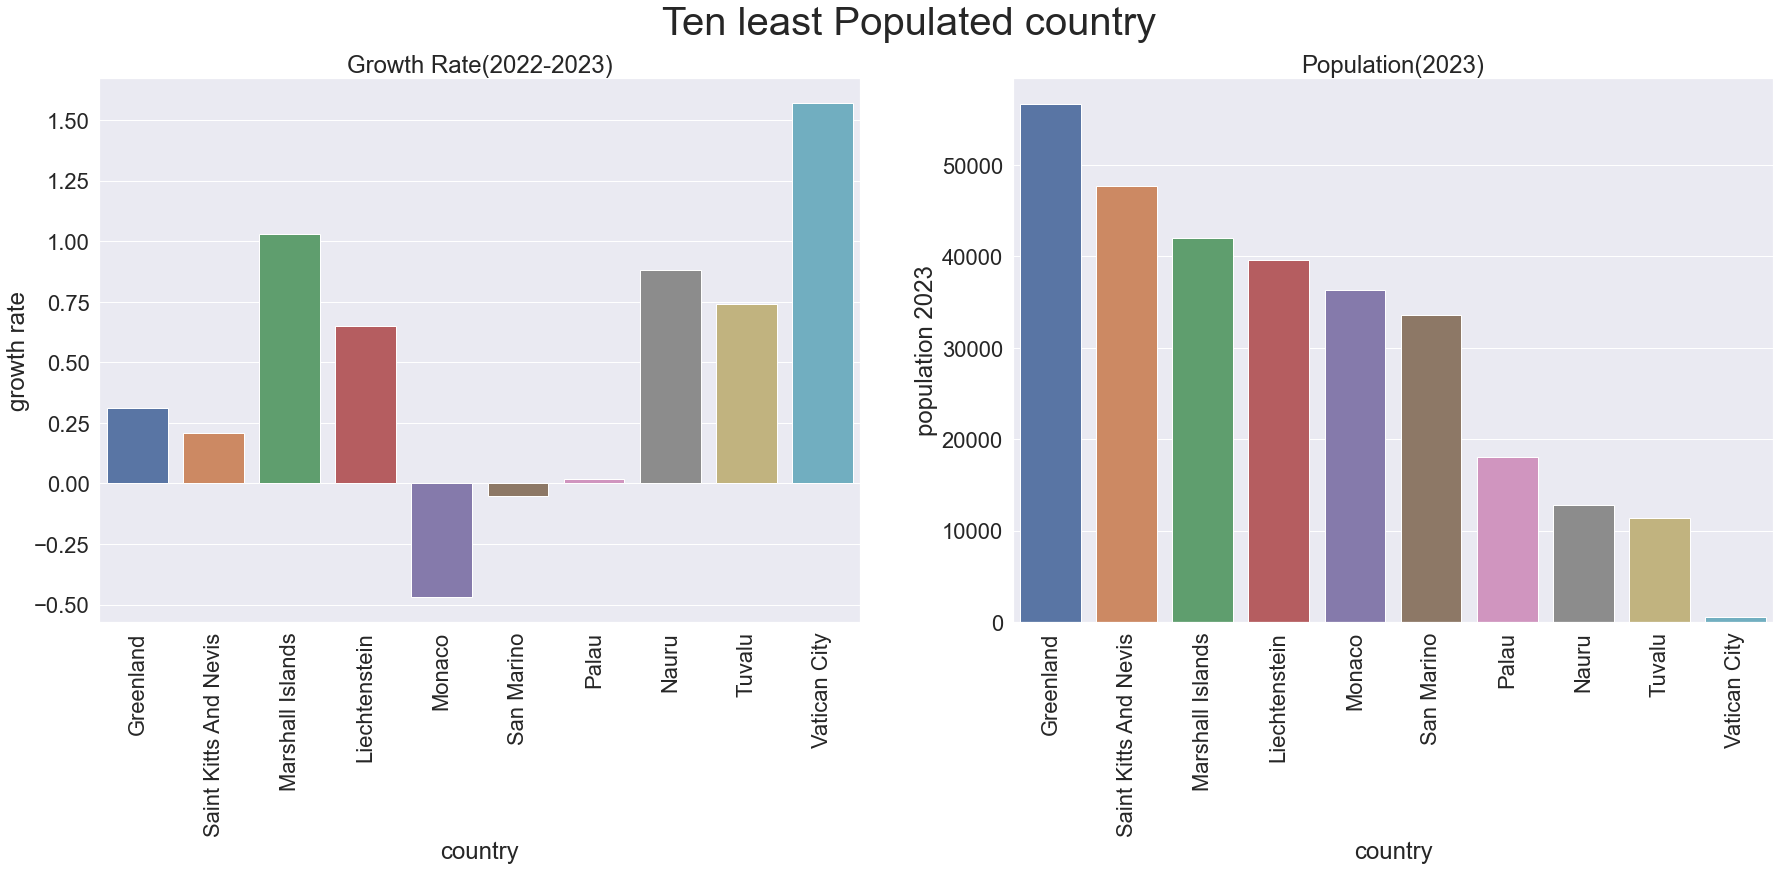

In [38]:
sns.set(font_scale=2)
fig,ax = plt.subplots(1,2,figsize=(30,10))

sns.barplot(data=new_data,x="country",y="growth rate",ax = ax[0])
sns.barplot(data=new_data,x="country",y="population 2023",ax = ax[1])
ax[0].set_title("Growth Rate(2022-2023)")
ax[1].set_title("Population(2023)")

ax[0].set_xticklabels(labels=new_data["country"],rotation=90)
ax[1].set_xticklabels(labels=new_data["country"],rotation=90)

plt.suptitle("Ten least Populated country",fontsize=40)
plt.show()

## What are the countries and dependencies with positive growth rates ?

In [45]:
pg = df[df["growth rate"]>0].sort_values("growth rate",ignore_index = True,ascending=False)


[]

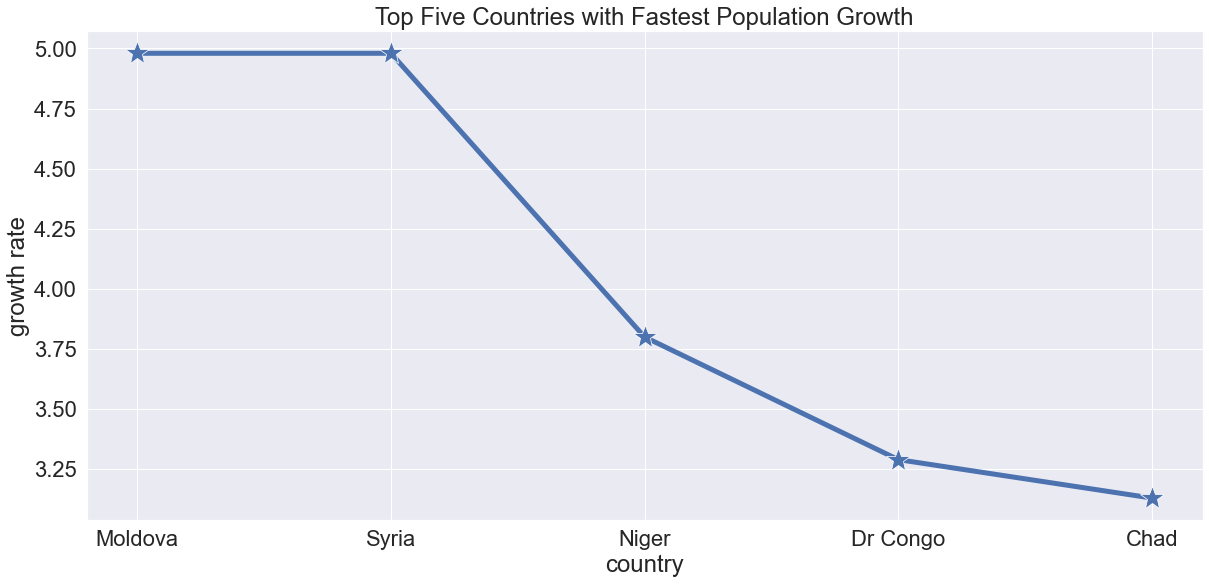

In [53]:
plt.figure(figsize=(20,9))

sns.lineplot(data=pg.head(),x="country",y="growth rate",
             marker= '*',markersize=25,
             linewidth=5)
plt.title("Top Five Countries with Fastest Population Growth")
plt.plot()

## What are the countries with 100 million population ?

In [57]:
df[df["population 2023"] > 100000000].sort_values("rank",ignore_index=False)

,country,population 2023,population 2022,area,land area,density,growth rate,world percentage,rank
0,India,1429834379,1417173173,3.3M,3M,481,0.91,17.85,1
1,China,1425820141,1425887337,9.7M,9.4M,151,-0.02,17.81,2
2,United States,339231549,338289857,9.4M,9.1M,37,0.50,4.25,3
3,Indonesia,276576867,275501339,1.9M,1.9M,148,0.74,3.47,4
4,Pakistan,238517163,235824862,881.9K,770.9K,312,1.98,3.00,5
5,Nigeria,221592544,218541212,923.8K,910.8K,246,2.41,2.80,6
6,Brazil,215904975,215313498,8.5M,8.4M,26,0.52,2.70,7
7,Bangladesh,172220907,171186372,147.6K,130.2K,"1,329",1.03,2.16,8
8,Russia,144652401,144713314,17.1M,16.4M,9,-0.19,1.80,9
9,Mexico,128061868,127504125,2M,1.9M,66,0.75,1.60,10


## Find the top five highly and least densed countries or depedencies in the world

In [69]:
high_density = df.sort_values("density",ascending=False,ignore_index=True)
d1 = high_density.head()
d1


,country,population 2023,population 2022,area,land area,density,growth rate,world percentage,rank
0,Armenia,2777970,2780469,29.7K,28.5K,98,-0.09,0.03,140
1,Kenya,54645002,54027487,580.4K,569.1K,97,1.99,0.69,26
2,Dominica,73040,72737,751,750,97,0.42,0.00,204
3,Cambodia,16869773,16767842,181K,176.5K,96,1.06,0.21,73
4,Honduras,10524012,10432860,112.5K,111.9K,95,1.54,0.13,88


In [70]:
least_density = df.sort_values("density",ascending=True,ignore_index=True)
d2 = least_density.head()
d2

,country,population 2023,population 2022,area,land area,density,growth rate,world percentage,rank
0,Greenland,56643,56466,2.2M,410.4K,0.14,0.31,0.00,208
1,Vatican City,518,510,< 1,< 1,"1,177",1.57,0.00,234
2,Bangladesh,172220907,171186372,147.6K,130.2K,"1,329",1.03,2.16,8
3,Malta,533747,533286,316,320,"1,672",0.33,0.01,173
4,Maldives,522338,523787,300,300,"1,737",-0.53,0.01,174


In [73]:
# append the high_density and least_density

total = d1.append(d2,ignore_index=True)
total

,country,population 2023,population 2022,area,land area,density,growth rate,world percentage,rank
0,Armenia,2777970,2780469,29.7K,28.5K,98,-0.09,0.03,140
1,Kenya,54645002,54027487,580.4K,569.1K,97,1.99,0.69,26
2,Dominica,73040,72737,751,750,97,0.42,0.00,204
3,Cambodia,16869773,16767842,181K,176.5K,96,1.06,0.21,73
4,Honduras,10524012,10432860,112.5K,111.9K,95,1.54,0.13,88
5,Greenland,56643,56466,2.2M,410.4K,0.14,0.31,0.00,208
6,Vatican City,518,510,< 1,< 1,"1,177",1.57,0.00,234
7,Bangladesh,172220907,171186372,147.6K,130.2K,"1,329",1.03,2.16,8
8,Malta,533747,533286,316,320,"1,672",0.33,0.01,173
9,Maldives,522338,523787,300,300,"1,737",-0.53,0.01,174


## visualize the relation between density and population

Text(0.5, 1.0, 'Relation Between Density and Population')

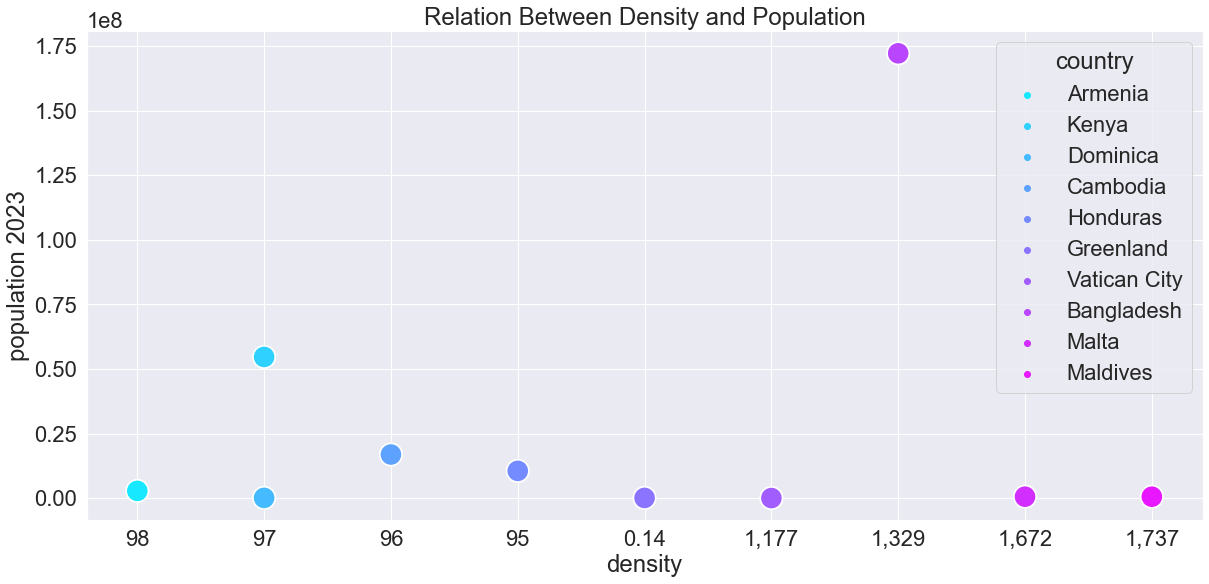

In [88]:
plt.figure(figsize=(20,9))

sns.scatterplot(data=total,x="density",y="population 2023",hue="country",s=500,palette="cool")
sns.set_style("darkgrid")
plt.title("Relation Between Density and Population")